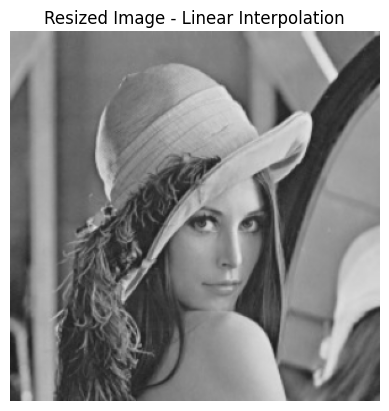

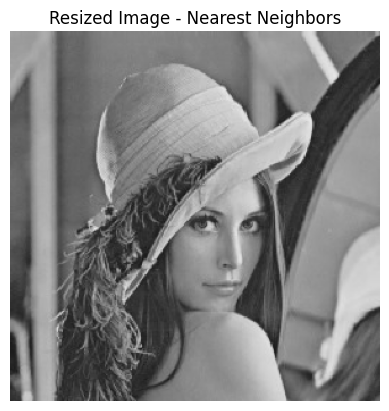

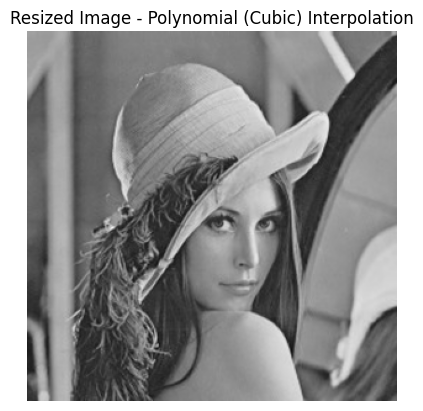

1.2 Image Blurring:


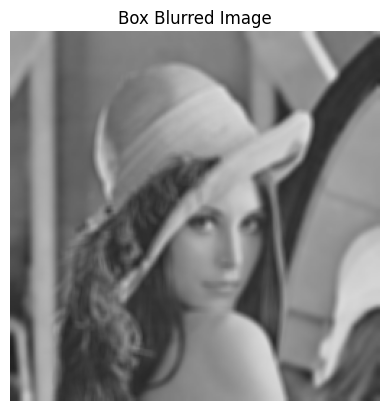

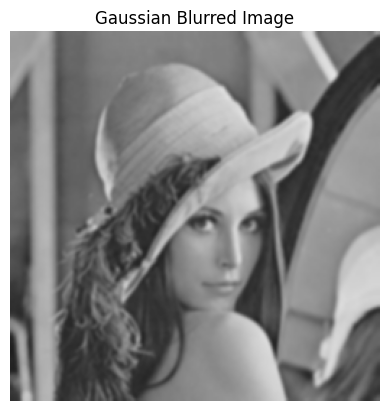

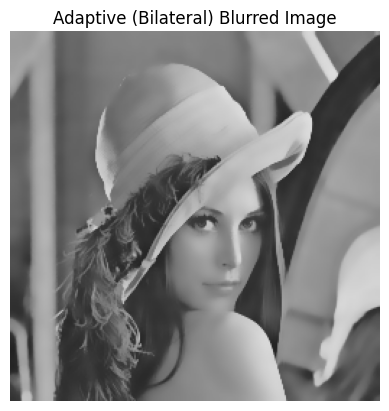

In [ ]:

import cv2
import numpy as np
from matplotlib import pyplot as plt


image = cv2.imread('lena_black.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

def display_image(image, title):
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')
    plt.show()




resized_linear = cv2.resize(image, (300, 300), interpolation=cv2.INTER_LINEAR)
display_image(resized_linear, "Resized Image - Linear Interpolation")


resized_nearest = cv2.resize(image, (300, 300), interpolation=cv2.INTER_NEAREST)
display_image(resized_nearest, "Resized Image - Nearest Neighbors")


resized_cubic = cv2.resize(image, (300, 300), interpolation=cv2.INTER_CUBIC)
display_image(resized_cubic, "Resized Image - Polynomial (Cubic) Interpolation")



box_blur = cv2.blur(image, (5, 5))
display_image(box_blur, "Box Blurred Image")


gaussian_blur = cv2.GaussianBlur(image, (5, 5), 0)
display_image(gaussian_blur, "Gaussian Blurred Image")

adaptive_blur = cv2.bilateralFilter(image, d=9, sigmaColor=75, sigmaSpace=75)
display_image(adaptive_blur, "Adaptive (Bilateral) Blurred Image")


In [ ]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import seaborn as sns

mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data, mnist.target.astype(int)
X = X / 255.0


In [ ]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:

models = {
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

In [ ]:

kf = KFold(n_splits=5, shuffle=True, random_state=42)

results = {}
for name, model in models.items():
    metrics = {"accuracy": [], "precision": [], "recall": [], "f1": []}
    for train_idx, val_idx in kf.split(X_train):
        X_kf_train, X_kf_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_kf_train, y_kf_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

        model.fit(X_kf_train, y_kf_train)
        y_pred = model.predict(X_kf_val)


        metrics["accuracy"].append(accuracy_score(y_kf_val, y_pred))
        metrics["precision"].append(precision_score(y_kf_val, y_pred, average="macro"))
        metrics["recall"].append(recall_score(y_kf_val, y_pred, average="macro"))
        metrics["f1"].append(f1_score(y_kf_val, y_pred, average="macro"))

    results[name] = {metric: np.mean(scores) for metric, scores in metrics.items()}

print("\nCross-Validation Results:")
for name, metrics in results.items():
    print(f"\n{name} Model Performance:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")


Cross-Validation Results:

Naive Bayes Model Performance:
accuracy: 0.5508
precision: 0.6648
recall: 0.5434
f1: 0.4960

Random Forest Model Performance:
accuracy: 0.9672
precision: 0.9669
recall: 0.9669
f1: 0.9669


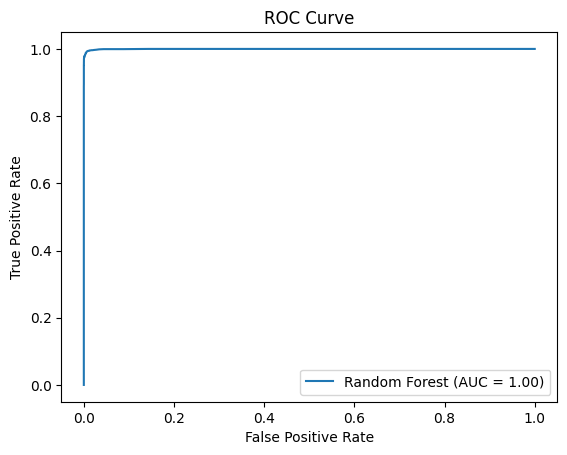


Naive Bayes Results:
accuracy: 0.5516
precision: 0.6733
recall: 0.5415
f1: 0.4964
roc_auc: 0.9701

Random Forest Results:
accuracy: 0.9675
precision: 0.9673
recall: 0.9674
f1: 0.9673
roc_auc: 0.9997


In [ ]:
final_results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_test_pred = model.predict(X_test)


    acc = accuracy_score(y_test, y_test_pred)
    prec = precision_score(y_test, y_test_pred, average="macro")
    rec = recall_score(y_test, y_test_pred, average="macro")
    f1 = f1_score(y_test, y_test_pred, average="macro")
    cm = confusion_matrix(y_test, y_test_pred)


    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1], pos_label=1)
    roc_auc = auc(fpr, tpr)

    final_results[name] = {
        "accuracy": acc,
        "precision": prec,
        "recall": rec,
        "f1": f1,
        "confusion_matrix": cm,
        "roc_auc": roc_auc
    }


plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

for name, metrics in final_results.items():
    print(f"\n{name} Results:")
    for metric, value in metrics.items():
        if metric != "confusion_matrix":
            print(f"{metric}: {value:.4f}")
